In [87]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import joblib
import time

# 1. Load the dataset

In [88]:
data = pd.read_csv('car data.csv')

# 2. Display Top 5 Rows of The Dataset

print(data.head())
# 3. Check Last 5 Rows of The Dataset

print(data.tail())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5 

In [89]:
# 4. Get Information About Our Dataset
data['Transmission'] = data['Transmission'].astype(str).str.strip()
data['Fuel_Type'] = data['Fuel_Type'].astype(str).str.strip()
data['Selling_type'] = data['Selling_type'].astype(str).str.strip()
print("\nInformation about the Dataset:")
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])
data.info()


Information about the Dataset:
Number of Rows: 301
Number of Columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [90]:
# 5. Check Null Values In The Dataset
print("\nNull Values in the Dataset:")
print(data.isnull().sum())



Null Values in the Dataset:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [91]:
# 7. Data Preprocessing
date_time = datetime.datetime.now()
data['Age'] = date_time.year - data['Year']
data.drop('Year', axis=1, inplace=True)
#removes year column and replace it with age, age from present time

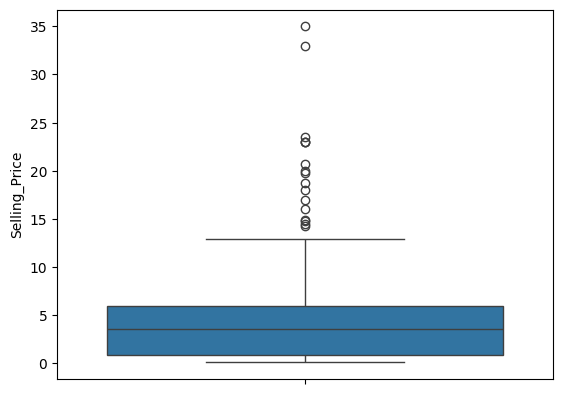

In [92]:
sns.boxplot(data['Selling_Price'])
data = data[(data['Selling_Price'] >= 0.1) & (data['Selling_Price'] <= 33.0)]


In [93]:
# Encoding the Categorical Columns
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
data['Selling_type'] = data['Selling_type'].map({'Dealer': 0, 'Individual': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})
#machines understand numbers better, encoding each entry

In [94]:
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']
#islolating the feature to be predicted from the training set

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [101]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor(),
    'ada_boost_reg' : AdaBoostRegressor(),
    'iso_forest' : IsolationForest(),
    'elasticnet_reg' : ElasticNet(),
    'decision_tree_reg' : DecisionTreeRegressor()
}

st=time.time()
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    if not model_name=='iso_forest':
        cv_scores = cross_val_score(model, X, y, cv=5)
        results[model_name] = {
            'R2 Score': r2,
            'MSE': mse,
            'RMSE': rmse,
            
        }
    results[model_name] = {
        'R2 Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'Cross-Validation Scores': cv_scores
    }
et=time.time()
print(et-st)

1.4550142288208008


In [97]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"R2 Score: {result['R2 Score']}")
    print(f"MSE: {result['MSE']}")
    print(f"RMSE: {result['RMSE']}")
    print(f"Cross-Validation Scores: {result['Cross-Validation Scores']}")
    print()

Model: Linear Regression
R2 Score: 0.814652611956298
MSE: 4.137755616906876
RMSE: 2.034147393112622
Cross-Validation Scores: [  0.86272781   0.78932978 -71.92920091   0.50623182   0.86503827]

Model: Random Forest Regressor
R2 Score: 0.9474988745610488
MSE: 1.1720522688333332
RMSE: 1.0826136286013275
Cross-Validation Scores: [ 0.96519604  0.79742772 -1.72135685  0.95245718  0.76798345]

Model: Gradient Boosting Regressor
R2 Score: 0.9731646176730725
MSE: 0.5990818383095131
RMSE: 0.7740037715085846
Cross-Validation Scores: [ 0.9717903   0.86133602 -1.486207    0.95106276  0.78721341]

Model: XGBoost Regressor
R2 Score: 0.9487686978501387
MSE: 1.1437043190598388
RMSE: 1.0694411246346565
Cross-Validation Scores: [ 0.95238843  0.7232379  -0.58602813  0.91951563  0.73807986]

Model: K-Nearest Neighbors Regressor
R2 Score: -0.015990632918880587
MSE: 22.681306666666664
RMSE: 4.762489545045392
Cross-Validation Scores: [-9.63713097e-02 -1.30446801e-01 -8.36946649e+02 -1.57039467e-01
 -1.7949854

In [102]:
#the best model is gradient boosting regressor using it for futher use
gradient_boosting_regressor = models['Gradient Boosting Regressor']  #
joblib.dump(gradient_boosting_regressor, 'car_price_predictor.pkl')


['car_price_predictor.pkl']

In [106]:
new_data = pd.DataFrame({
    'Present_Price': 5.59,
    'Driven_kms': 27000,
    'Fuel_Type': 0, #petrol
    'Selling_type': 0, #dealer
    'Transmission': 0, #manual
    'Owner': 0,
    'Age': 8
}, index=[0])

In [107]:
loaded_model = joblib.load('car_price_predictor.pkl')
print(type(loaded_model))
predicted_price = loaded_model.predict(new_data)
print("\nPredicted Price on New Data:", predicted_price[0])

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>

Predicted Price on New Data: 3.78572154299673
